In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [6]:
data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.4526027629719195

In [36]:
from sklearn.linear_model import Ridge

ri = Ridge(alpha=0.2)
ri.fit(X_train, y_train)
y_pred = ri.predict(X_test)

r2_score(y_test, y_pred)

0.46113836892116744

In [37]:
print(f'With ridge regularization :\n Intercept : {ri.intercept_}\n Coefficeints : {ri.coef_}')
print(f'Without ridge regularization :\n Intercept : {lr.intercept_}\n Coefficeints : {lr.coef_}')

With ridge regularization :
 Intercept : 151.59056002392865
 Coefficeints : [  43.84176324 -178.16466087  463.67778665  295.71548215  -68.49129127
  -87.4175183  -191.98568348  143.15931921  353.70880287   94.95802847]
Without ridge regularization :
 Intercept : 151.34560453985995
 Coefficeints : [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


[86.84711307] [91.76995471]


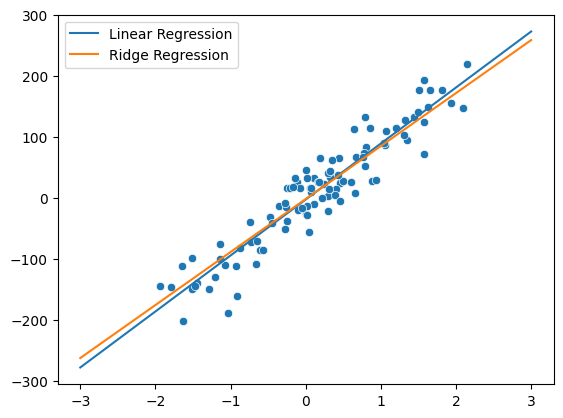

In [79]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=1, n_targets=1, n_samples=100, noise=30)
X_plot = np.linspace(-3, 3, 25).reshape(-1,1)

lr = LinearRegression()
ri = Ridge(alpha=5)

lr.fit(X, y)
ri.fit(X, y)
y_plot_lr = lr.predict(X_plot)
y_plot_ri = ri.predict(X_plot)

sns.scatterplot(x=X.ravel(), y=y)
sns.lineplot(x=X_plot.ravel(), y=y_plot_lr, label='Linear Regression')
sns.lineplot(x=X_plot.ravel(), y=y_plot_ri, label='Ridge Regression')

print(ri.coef_, lr.coef_)

/home/ree/python_venv/ML/lib64/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.64491e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


(-10.0, 20.0)

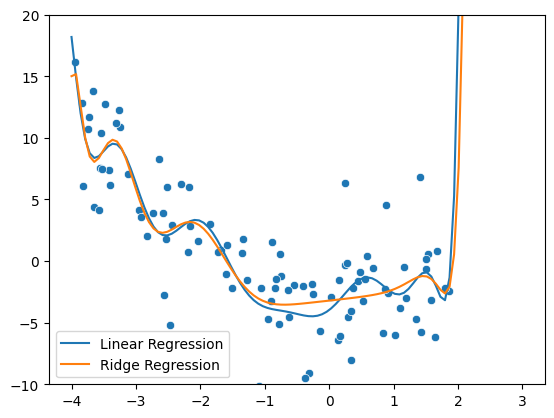

In [148]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X = 6 * np.random.random(100).reshape(-1,1) - 4
y = X**2 + 0.3 + (4*np.random.randn(100).reshape(-1,1) -3)
X_plot = np.linspace(-4, 3, 100).reshape(-1,1)

poly = PolynomialFeatures(degree=15, include_bias=True)
X_trf = poly.fit_transform(X)
X_plot_trf = poly.transform(X_plot)

lr = LinearRegression()
ri = Ridge(alpha=20)
lr.fit(X_trf, y)
ri.fit(X_trf, y)
y_plot_lr = lr.predict(X_plot_trf)
y_plot_ri = ri.predict(X_plot_trf)

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_plot.ravel(), y=y_plot_lr.ravel(), label='Linear Regression')
sns.lineplot(x=X_plot.ravel(), y=y_plot_ri.ravel(), label='Ridge Regression')
plt.ylim(-10, 20)

In [137]:
r

(array([[ 0.00000000e+00,  4.56712588e-01,  7.38975748e-01,
          1.67513546e-01,  6.02831628e-01, -2.82080395e-02,
          1.08349045e-01, -4.63368174e-02, -4.23100665e-01,
         -1.23740568e-01,  1.41396431e-01,  7.34574620e-02,
         -4.39137889e-03, -9.61665529e-03, -2.20365977e-03,
         -1.61690878e-04]]),
 array([[ 0.00000000e+00, -3.24684582e+00,  9.61398112e+00,
          2.40699200e+01,  5.09940600e+00, -2.66274650e+01,
         -1.59856516e+01,  8.95976853e+00,  9.06611472e+00,
          5.17539359e-02, -1.86481227e+00, -4.88819929e-01,
          8.19465076e-02,  5.78765213e-02,  9.81472645e-03,
          5.73492739e-04]]))